# State preparation for staggered $Z_2$ gauge theory

## Import modules

In [1]:
# standard modules
import sys
import numpy as np
from typing import Optional
from itertools import product

# qiskit modules
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.display import Image
plt.rcParams["figure.autolayout"] = True
colors = list(mcolors.TABLEAU_COLORS.keys())

# Z2 project modules
sys.path.append('./modules/')
sys.path.append('./inputs/')
sys.path.append('./plots/')
from Trotterization import trotter_evolution_generic, trotter_evolution_2sites 
from Z2analysis import net_charge, nsites2nqubits, nqubits2nsites
from StatePrep import prepare_zbasis_state, prepare_states_nsites2, prepare_states_nsites4

# other stuff
%matplotlib inline
%load_ext autoreload
%autoreload trotter_evolution_generic

Prepare gauge-invariant states for $n_{\rm qubits} = 2n_{\rm sites}-1$, where $n_{\rm sites} = 2,4,6,\ldots$.

Time evolve state `psi` with Trotterized (1+1)-dimensional $Z_2$ Hamiltonian.

In [2]:
def trotter_evolve(psi, nsites : int, epsilon : float, mass : float,
                   ntrotter : int, twirl = False, save_state_vector = False):
    
    new_psi = trotter_evolution_generic(psi, nsites, epsilon, mass, ntrotter, twirl=twirl, save_state_vector=save_state_vector)
    statevector = Statevector(new_psi).to_dict()
    
    # calculate individual z-basis state probabilities + total
    # plot_histogram cannot accommodate complex-valued coefficients
    # so explicitly replace statevector entries absolute value
    total = 0.0
    probabilities = {}
    for key in statevector.keys():
        p = np.abs(statevector[key])
        probabilities[key] = p
        total = total + p**2       
    
    return statevector, probabilities, total


Time evolve initial `state` by $\left(\rm{exp}[-i {\mathcal H} \epsilon]\right)^{n_{\rm trotter}}$ for multiple values of $\epsilon$ and plot results.

# 2-state / 3-qubit system

In [16]:
# simulation parameters
nqubits = 3
mass = 1.0
ntrotter = 1

## Evolve individual z basis states

Time evolve all states according to $\left(\rm{exp}[-i {\mathcal H} \epsilon]\right)^{n_{\rm trotter}}$ and plot results. Identify states that mix under time evolution.

(1, 1, 1) {'000': (1+0j)} 0
(1, 1, 1) {'001': (1+0j)} -1
(1, 1, 1) {'010': (1+0j)} 0
(1, 1, 1) {'011': (1+0j)} -1
(1, 1, 1) {'100': (1+0j)} 1
(1, 1, 1) {'101': (1+0j)} 0
(1, 1, 1) {'110': (1+0j)} 1
(1, 1, 1) {'111': (1+0j)} 0


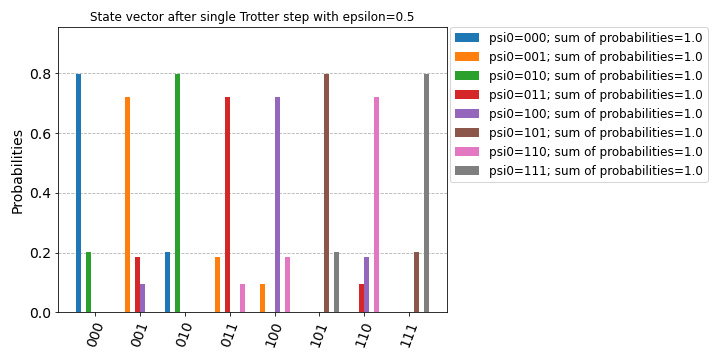

In [17]:
# time step and output file name
epsilon = 0.5
filename = './plots/3qubit_zbasis_epsilon0pt5'

state_dict = {}
for state in product(range(2), repeat=nqubits):
    name = ''.join(str(e) for e in state)
    state_dict[name] = prepare_zbasis_state(nqubits,state)
    
time_evolve_multistates(state_dict, epsilon, mass, ntrotter, filename)
Image(filename+'.png')

Under time evolution:

- states $|000\rangle$ and $|010\rangle$ mix with each other
- states $|101\rangle$ and $|111\rangle$ mix with each other
- states $|001\rangle$, $|011\rangle$, $100\rangle$, and $|110\rangle$ mix with each other

## Evolve gauge-invariant states with $Q_{\rm net} = 0$

Time evolve each state according to $\left(\rm{exp}[-i {\mathcal H} \epsilon]\right)$ for multiple values of $\epsilon$ and plot results. Study the effect of the Trotter step size $\epsilon$.

### Vacuum initial state $|\psi_i\rangle = |0+0\rangle$

In [3]:
# dictionary of 2-site gauge-invariant initial states with Q_net=0
state_dict = prepare_states_nsites2(nqubits)
eps_list = list(np.arange(0.1,1.1,0.2))

# evolve vacuum (empty) state
state_name = '|0+0>'
filename = './plots/3qubit_vacuum'
time_evolve_singlestate(state_dict['vacuum'], state_name, eps_list, mass, ntrotter, filename)
Image(filename+'.png')

Traceback (most recent call last):
  Input In [3] in <cell line: 2>
    state_dict = prepare_states_nsites2(nqubits)
NameError: name 'nqubits' is not defined

Use %tb to get the full traceback.


### Exited initial state $|\psi_i\rangle = |1-1\rangle$

initial
state    statevector
---------------------------------------------
vacuum   {'000': (0.71+0j), '010': (0.71+0j)}
Qnet = 0

all states present after time evolution ['010', '000']


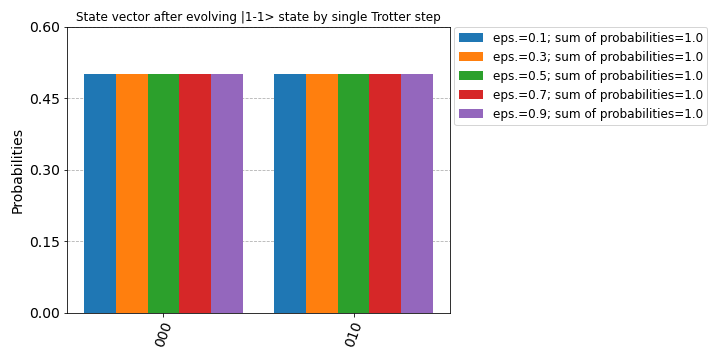

In [26]:
# evolve meson (e+e-) initial state
state_name = '|1-1>'
filename = './plots/3qubit_meson'
time_evolve_singlestate(state_dict['vacuum'], state_name, eps_list, mass, ntrotter, filename)
Image(filename+'.png')

**Take-away:** Both the vacuum state $|\tilde{0}\rangle = |0+0\rangle$ and the excited state $|\tilde{1}\rangle = |1-1\rangle$ are eigenstates of the Trotterized Hamiltonian. Although this means that the 2-site (3-qubit) system has no dynamics, it _allows us to study and quantify systematics such as those from readout and gate errors in a simple, clean environment_. 

# Time evolution of 4-site / 7-qubit system

_Focus on states with $Q_{\rm net} = 0$._

## Construct gauge-inviariant states with $Q_{\rm net} = 0$

vacuum {'0000000': (0.35+0j), '0000010': (0.35+0j), '0001000': (0.35+0j), '0001010': (0.35+0j), '0100000': (0.35+0j), '0100010': (0.35+0j), '0101000': (0.35+0j), '0101010': (0.35+0j)}
Qnet = 0

e-e+  in middle of lattice {'0010100': (0.35+0j), '0010110': (0.35+0j), '0011100': (-0.35+0j), '0011110': (-0.35+0j), '0110100': (0.35+0j), '0110110': (0.35+0j), '0111100': (-0.35+0j), '0111110': (-0.35+0j)}
Qnet = 0


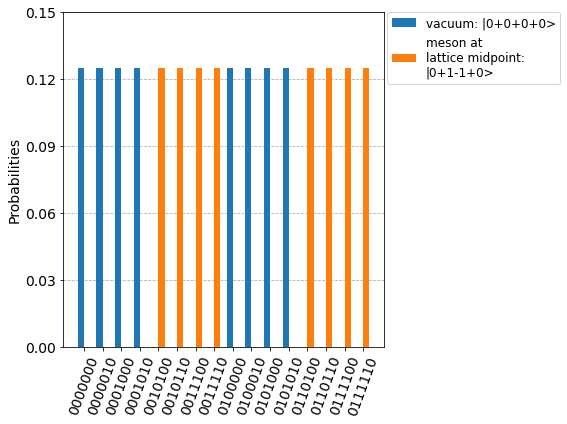

In [33]:
# set number of sites to 4
nsites = 4
nqubits = nsites2nqubits(nsites)

# create gauge-invariant initial states with Q_net=0
state_dict = prepare_states_nsites4(nqubits)

# GROUND STATE
psi_vac_4site = state_dict['vacuum'] 
statevec_vac = Statevector(psi_vac_4site).to_dict()
print('vacuum', round_statevector(statevec_vac,2))

Qnet = list(set([net_charge(key) for key in statevec_vac]))
if (len(Qnet) > 1):
    print('*** WARNING: state does not have definite net charge ***')
print(f'Qnet = {Qnet[0]}')

# EXCITED STATE W/ e+e- PAIR IN MIDDLE OF LATTICE
psi_mes_4site = state_dict['meson']  
statevec_mes = Statevector(psi_mes_4site).to_dict()
print('\ne-e+  in middle of lattice', round_statevector(statevec_mes,2))

Qnet = list(set([net_charge(key) for key in statevec_mes]))
if (len(Qnet) > 1):
    print('*** WARNING: state does not have definite net charge ***')
print(f'Qnet = {Qnet[0]}')

plot_histogram([abs_statevector(statevec_vac),abs_statevector(statevec_mes)],legend=['vacuum: |0+0+0+0>','meson at\nlattice midpoint:\n|0+1-1+0>'],figsize = (8,6),bar_labels=False, color=colors[:2])


e-e+  in first two sites {'0000101': (0.35+0j), '0000111': (-0.35+0j), '0001101': (0.35+0j), '0001111': (-0.35+0j), '0100101': (0.35+0j), '0100111': (-0.35+0j), '0101101': (0.35+0j), '0101111': (-0.35+0j)}
Qnet = 0

e-e+ in last two sites {'1010000': (0.35+0j), '1010010': (0.35+0j), '1011000': (0.35+0j), '1011010': (0.35+0j), '1110000': (-0.35+0j), '1110010': (-0.35+0j), '1111000': (-0.35+0j), '1111010': (-0.35+0j)}
Qnet = 0


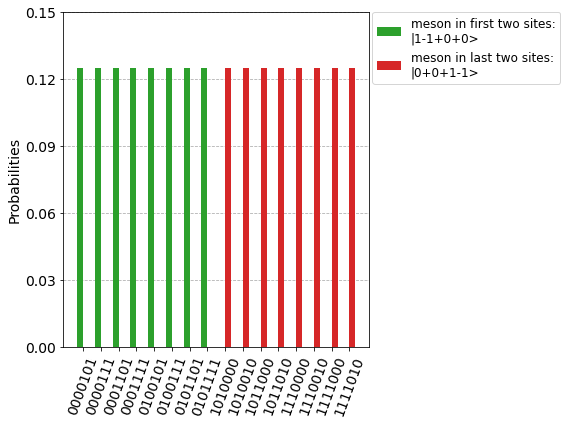

In [34]:
# e+e- PAIR IN ONLY FIRST TWO SITES
psi_mes_start = state_dict['meson-start']  
statevec_mes_start = Statevector(psi_mes_start).to_dict()
print('\ne-e+  in first two sites', round_statevector(statevec_mes_start,2))

Qnet = list(set([net_charge(key) for key in statevec_mes_start]))
if (len(Qnet) > 1):
    print('*** WARNING: state does not have definite net charge ***')
print(f'Qnet = {Qnet[0]}')

# e+e- PAIR IN ONLY LAST TWO SITES
psi_mes_end = state_dict['meson-end']  
statevec_mes_end = Statevector(psi_mes_end).to_dict()
print('\ne-e+ in last two sites', round_statevector(statevec_mes_end,2))

Qnet = list(set([net_charge(key) for key in statevec_mes_end]))
if (len(Qnet) > 1):
    print('*** WARNING: state does not have definite net charge ***')
print(f'Qnet = {Qnet[0]}')

plot_histogram([abs_statevector(statevec_mes_start),abs_statevector(statevec_mes_end)],legend=['meson in first two sites:\n|1-1+0+0>','meson in last two sites:\n|0+0+1-1>'],figsize = (8,6),bar_labels=False,color=colors[2:4])


fermion in first and last sites {'1000001': (0.35+0j), '1000011': (-0.35+0j), '1001001': (-0.35+0j), '1001011': (0.35+0j), '1100001': (-0.35+0j), '1100011': (0.35+0j), '1101001': (0.35+0j), '1101011': (-0.35+0j)}
Qnet = 0

fermion in all sites {'1010101': (0.35+0j), '1010111': (-0.35+0j), '1011101': (0.35+0j), '1011111': (-0.35+0j), '1110101': (-0.35+0j), '1110111': (0.35+0j), '1111101': (-0.35+0j), '1111111': (0.35+0j)}
Qnet = 0


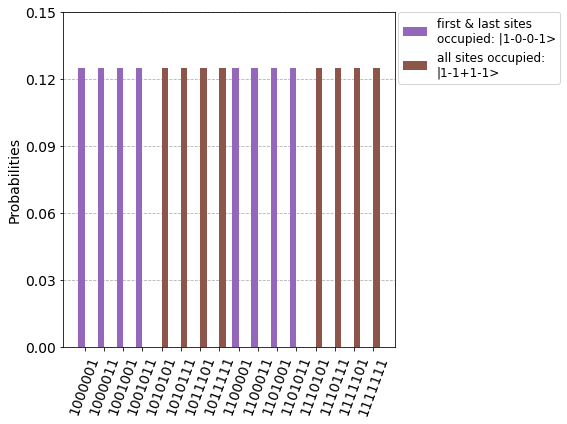

In [35]:
# FERMION IN ONLY FIRST AND LAST SITES
psi_mes_stretch = state_dict['meson-stretch']
statevec_mes_stretch = Statevector(psi_mes_stretch).to_dict()
print('\nfermion in first and last sites', round_statevector(statevec_mes_stretch,2))

Qnet = list(set([net_charge(key) for key in statevec_mes_stretch]))
if (len(Qnet) > 1):
    print('*** WARNING: state does not have definite net charge ***')
print(f'Qnet = {Qnet[0]}')

# ALL LATTICE SITES FILLED
psi_2mes = state_dict['2meson']  
statevec_2mes = Statevector(psi_2mes).to_dict()
print('\nfermion in all sites', round_statevector(statevec_2mes,2))

Qnet = list(set([net_charge(key) for key in statevec_2mes]))
if (len(Qnet) > 1):
    print('*** WARNING: state does not have definite net charge ***')
print(f'Qnet = {Qnet[0]}')

plot_histogram([abs_statevector(statevec_mes_stretch),abs_statevector(statevec_2mes)],legend=['first & last sites\noccupied: |1-0-0-1>','all sites occupied:\n|1-1+1-1>'],figsize = (8,6),bar_labels=False,color=colors[4:6])

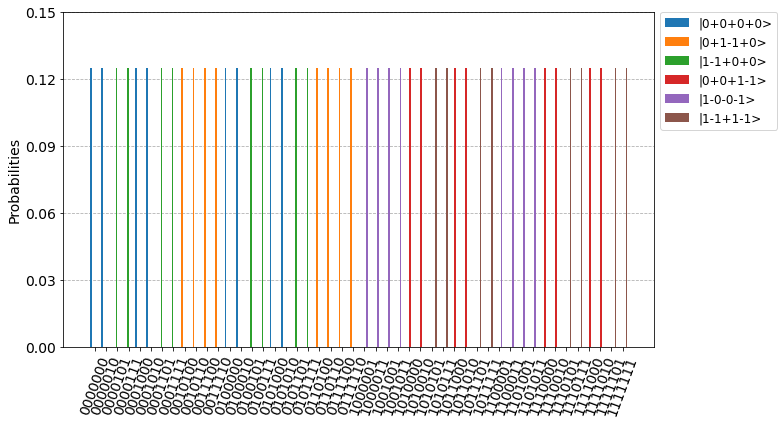

In [36]:
plot_histogram([abs_statevector(statevec_vac),abs_statevector(statevec_mes),abs_statevector(statevec_mes_start),abs_statevector(statevec_mes_end),abs_statevector(statevec_mes_stretch),abs_statevector(statevec_2mes)],legend=['|0+0+0+0>','|0+1-1+0>','|1-1+0+0>','|0+0+1-1>','|1-0-0-1>','|1-1+1-1>'],figsize = (11,6),bar_labels=False, color=colors[:6])

$\Rightarrow$ All 6 gauge-invariant states with $Q_{\rm net}=0$ are orthogonal.

## Evolve gauge-invariant states with $Q_{\rm net} = 0$

### **Vacuum state:** $|\psi_i\rangle = |0+0+0+0\rangle$

In [39]:
twirl=False
save_state_vector=False

initial
state    statevector
---------------------------------------------
vacuum   {'0000000': (0.35+0j), '0000010': (0.35+0j), '0001000': (0.35+0j), '0001010': (0.35+0j), '0100000': (0.35+0j), '0100010': (0.35+0j), '0101000': (0.35+0j), '0101010': (0.35+0j)}

*** 0 new states introduced by time evolution ***
[]


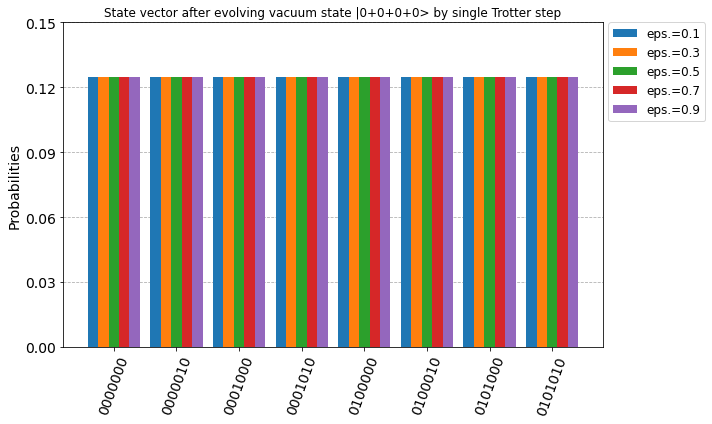

In [40]:
# study effect of Trotter step size epsilon
# run simulation for initial state |0+0+0+0>

statevectors_vac = []
legend_vac = []
probabilities_vac = []
print_state = True

print('initial\nstate    statevector\n---------------------------------------------')
for epsilon in np.arange(0.1,1.1,0.2):
    
    # reset initial state each time
    psi_0 = psi_vac_4site.copy()
    if (print_state):
        print('vacuum  ', round_statevector(Statevector(psi_0).to_dict()))
        initial_states = get_unique_states([Statevector(psi_0).to_dict()])
        #print('\nstates present before time evolution '+str(initial_states))
        print_state = False
    
    # time evolve state vector using Trotterized Hamiltonian
    statevector, probabilities, total_prob = trotter_evolve(psi_0, nsites, epsilon, mass, ntrotter,
                                                twirl=twirl, save_state_vector=save_state_vector)
    
    statevectors_vac.append(statevector)
    probabilities_vac.append(round_statevector(probabilities,3))  # useful for checking unitarity
       
    # label for plot legend
    legend_vac.append("eps.="+str(round(epsilon,2)))

# remove dictionary entries for basis state if coefficient is zero for all statevectors in list
clean_statevectors(probabilities_vac)   
final_states = get_unique_states(probabilities_vac)
#print('\nstates present after time evolution '+str(final_states))

new_states = list(set(final_states)-set(initial_states))
print('\n*** '+str(len(new_states))+' new states introduced by time evolution ***\n'+str(new_states))
    
plot_histogram(probabilities_vac,title='State vector after evolving vacuum state |0+0+0+0> by single Trotter step',legend=legend_vac,bar_labels=False,color=colors[:len(statevectors_vac)],figsize=(10,6))

### **Filled state:** $|\psi_i\rangle = |1-1+1-1\rangle$

initial
state    statevector
--------------------------------------------
2-meson  {'1010101': (0.35+0j), '1010111': (-0.35+0j), '1011101': (0.35+0j), '1011111': (-0.35+0j), '1110101': (-0.35+0j), '1110111': (0.35+0j), '1111101': (-0.35+0j), '1111111': (0.35+0j)}

*** 0 new states introduced by time evolution ***
[]


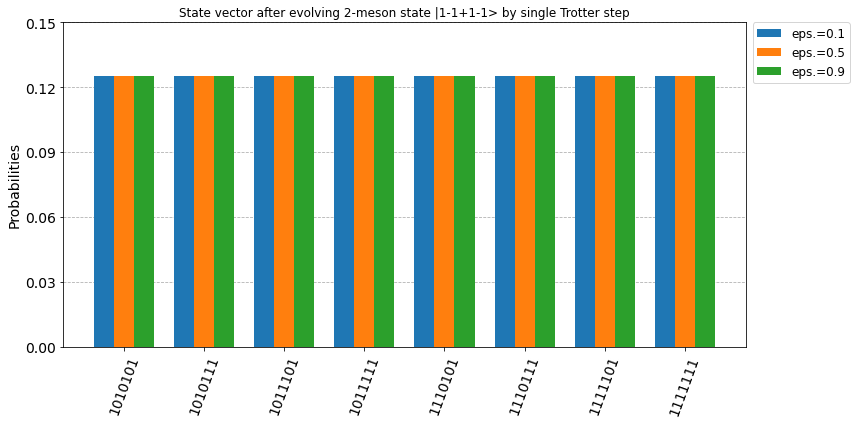

In [41]:
# study effect of Trotter step size epsilon
# run simulation for initial state |0+1-1+0>

statevectors_mes = []
legend_mes = []
probabilities_mes = []
print_state = True

print('initial\nstate    statevector\n--------------------------------------------')
for epsilon in np.arange(0.1,1.1,0.4):
    
    # reset initial state each time
    psi_1 = psi_2mes.copy()
    if (print_state):
        psi1_dict = Statevector(psi_1).to_dict()
        print('2-meson ', round_statevector(psi1_dict))
        initial_states = get_unique_states([psi1_dict])
        #print('\nstates present before time evolution '+str(initial_states))
        print_state = False
    
    # time evolve state vector using Trotterized Hamiltonian
    statevector, probabilities, total_prob = trotter_evolve(psi_1, nsites, epsilon, mass, ntrotter,
                                                twirl=twirl, save_state_vector=save_state_vector)
    
    statevectors_mes.append(statevector)
    probabilities_mes.append(round_statevector(probabilities,2))  # useful for checking unitarity
       
    # label for plot legend
    legend_mes.append("eps.="+str(round(epsilon,2)))
    
# remove dictionary entries for basis state if coefficient is zero for all statevectors in list
# probabilities_mes += [abs_statevector(statevec_mes_start),abs_statevector(statevec_mes_end)]
clean_statevectors(probabilities_mes)   
final_states = get_unique_states(probabilities_mes)
#print('\nstates present after time evolution '+str(final_states))   

new_states = list(set(final_states)-set(initial_states))
print('\n*** '+str(len(new_states))+' new states introduced by time evolution ***\n'+str(new_states))
 
plot_histogram(probabilities_mes,title='State vector after evolving 2-meson state |1-1+1-1> by single Trotter step',legend=legend_mes,bar_labels=False,color=colors[:len(statevectors_mes)+3],figsize=(12,6))

**Take-away:** The gauge-invariant vacuum state $|\tilde{0}\rangle = |0+0+0+0\rangle$ and completely filled state $|\tilde{2}\rangle = |1-1+1-1\rangle$ is an eigenstate of the Trotterized Hamiltonian. 

### **First two sites filled:** $|\psi_i\rangle = |1-1+0+0\rangle$

initial
state    statevector
--------------------------------------------
meson    {'0000101': (0.35+0j), '0000111': (-0.35+0j), '0001101': (0.35+0j), '0001111': (-0.35+0j), '0100101': (0.35+0j), '0100111': (-0.35+0j), '0101101': (0.35+0j), '0101111': (-0.35+0j)}

*** 8 new states introduced by time evolution ***
['0011011', '0111011', '0011001', '0010011', '0111001', '0110011', '0010001', '0110001']

*** WARNING: final state does not have definite net charge ***
Qnet(final) = [0, -2]


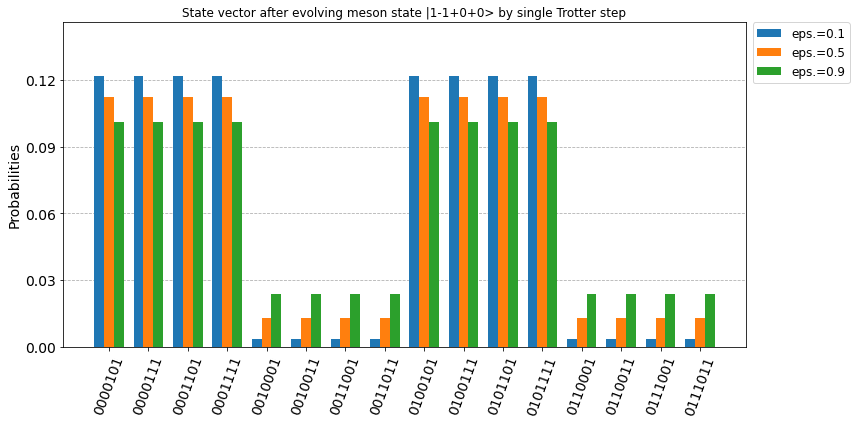

In [42]:
# study effect of Trotter step size epsilon
# run simulation for initial state |1-1+0+0+0>

statevectors_mes = []
legend_mes = []
probabilities_mes = []
print_state = True

print('initial\nstate    statevector\n--------------------------------------------')
for epsilon in np.arange(0.1,1.1,0.4):
    
    # reset initial state each time
    psi_1 = psi_mes_start.copy()
    if (print_state):
        psi1_dict = Statevector(psi_1).to_dict()
        print('meson   ', round_statevector(psi1_dict))
        initial_states = get_unique_states([psi1_dict])
        #print('\nstates present before time evolution '+str(initial_states))
        print_state = False
    
    # time evolve state vector using Trotterized Hamiltonian
    statevector, probabilities, total_prob = trotter_evolve(psi_1, nsites, epsilon, mass, ntrotter,
                                                twirl=twirl, save_state_vector=save_state_vector)
    
    statevectors_mes.append(statevector)
    probabilities_mes.append(round_statevector(probabilities,2))  # useful for checking unitarity
       
    # label for plot legend
    legend_mes.append("eps.="+str(round(epsilon,2)))
    
# remove dictionary entries for basis state if coefficient is zero for all statevectors in list
clean_statevectors(probabilities_mes)   
final_states = get_unique_states(probabilities_mes)
#print('\nstates present after time evolution '+str(final_states))  

new_states = list(set(final_states)-set(initial_states))
print('\n*** '+str(len(new_states))+' new states introduced by time evolution ***\n'+str(new_states))

Qnet = list(set([net_charge(s) for s in final_states]))
if (len(Qnet) > 1):
    print(f'\n*** WARNING: final state does not have definite net charge ***\nQnet(final) = {Qnet}')
else:
    print(f'\nQnet(final) = {Qnet[0]}')
 
plot_histogram(probabilities_mes,title='State vector after evolving meson state |1-1+0+0> by single Trotter step',legend=legend_mes,bar_labels=False,color=colors[:len(statevectors_mes)]+[colors[6],colors[4]],figsize=(12,6))

### **Middle two sites filled:** $|\psi_i\rangle = |0+1-1+0\rangle$

initial
state    statevector
--------------------------------------------
meson    {'0010100': (0.35+0j), '0010110': (0.35+0j), '0011100': (-0.35+0j), '0011110': (-0.35+0j), '0110100': (0.35+0j), '0110110': (0.35+0j), '0111100': (-0.35+0j), '0111110': (-0.35+0j)}

*** 40 new states introduced by time evolution ***
['1111000', '0101111', '0111011', '0101101', '1101100', '1001001', '1000011', '1100100', '0000111', '0011011', '0000101', '1101001', '0010011', '0111001', '1100001', '0001101', '1011000', '0100111', '1100011', '1100110', '1000110', '1001110', '1000001', '0011001', '0100101', '1101110', '1000100', '1001100', '1011010', '0001111', '1001011', '1110010', '0110001', '1010000', '1110000', '1010010', '1101011', '1111010', '0110011', '0010001']

*** WARNING: final state does not have definite net charge ***
Qnet(final) = [0, 2, -2]


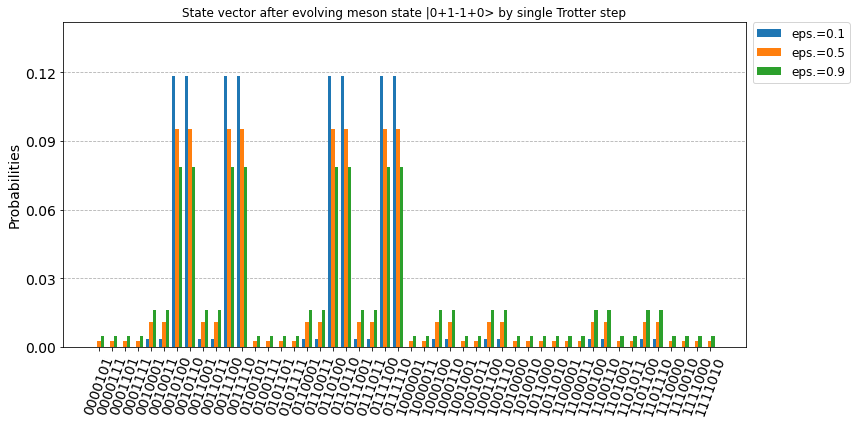

In [43]:
# study effect of Trotter step size epsilon
# run simulation for initial state |0+1-1+0>

statevectors_mes = []
legend_mes = []
probabilities_mes = []
print_state = True 

print('initial\nstate    statevector\n--------------------------------------------')
for epsilon in np.arange(0.1,1.1,0.4):
    
    # reset initial state each time
    psi_1 = psi_mes_4site.copy()
    if (print_state):
        psi1_dict = Statevector(psi_1).to_dict()
        print('meson   ', round_statevector(psi1_dict))
        initial_states = get_unique_states([psi1_dict])
        #print('\nstates present before time evolution '+str(initial_states))
        print_state = False    
    
    # time evolve state vector using Trotterized Hamiltonian
    statevector, probabilities, total_prob = trotter_evolve(psi_1, nsites, epsilon, mass, ntrotter,
                                                twirl=twirl, save_state_vector=save_state_vector)
    
    statevectors_mes.append(statevector)
    probabilities_mes.append(round_statevector(probabilities,2))  # useful for checking unitarity
       
    # label for plot legend
    legend_mes.append("eps.="+str(round(epsilon,2)))
    
# remove dictionary entries for basis state if coefficient is zero for all statevectors in list
# probabilities_mes += [abs_statevector(statevec_mes_start),abs_statevector(statevec_mes_end)]
clean_statevectors(probabilities_mes)   
final_states = get_unique_states(probabilities_mes)
#print('\nstates present after time evolution '+str(final_states))     

new_states = list(set(final_states)-set(initial_states))
print('\n*** '+str(len(new_states))+' new states introduced by time evolution ***\n'+str(new_states))

Qnet = list(set([net_charge(s) for s in final_states]))
if (len(Qnet) > 1):
    print(f'\n*** WARNING: final state does not have definite net charge ***\nQnet(final) = {Qnet}')
else:
    print(f'\nQnet(final) = {Qnet[0]}')
 
plot_histogram(probabilities_mes,title='State vector after evolving meson state |0+1-1+0> by single Trotter step',legend=legend_mes,bar_labels=False,color=colors[:len(statevectors_mes)+3],figsize=(12,6))

### **Last two sites filled:** $|\psi_i\rangle = |0+0+1-1\rangle$

initial
state    statevector
--------------------------------------------
meson    {'1010000': (0.35+0j), '1010010': (0.35+0j), '1011000': (0.35+0j), '1011010': (0.35+0j), '1110000': (-0.35+0j), '1110010': (-0.35+0j), '1111000': (-0.35+0j), '1111010': (-0.35+0j)}

*** 8 new states introduced by time evolution ***
['1100110', '1001110', '1000110', '1101110', '1101100', '1000100', '1001100', '1100100']

*** WARNING: final state does not have definite net charge ***
Qnet(final) = [0, 2]


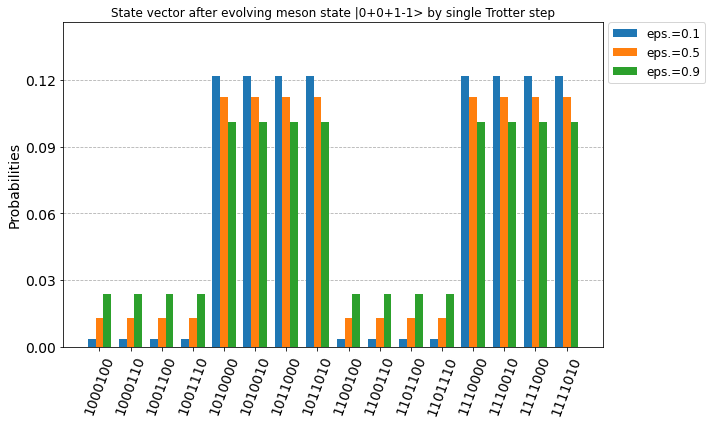

In [44]:
# study effect of Trotter step size epsilon
# run simulation for initial state |0+0+1-1>

statevectors_mes = []
legend_mes = []
probabilities_mes = []
print_state = True 

print('initial\nstate    statevector\n--------------------------------------------')
for epsilon in np.arange(0.1,1.1,0.4):
    
    # reset initial state each time
    psi_1 = psi_mes_end.copy()
    if (print_state):
        psi1_dict = Statevector(psi_1).to_dict()
        print('meson   ', round_statevector(psi1_dict))
        initial_states = get_unique_states([psi1_dict])
        #print('\nstates present before time evolution '+str(initial_states))
        print_state = False    
    
    # time evolve state vector using Trotterized Hamiltonian
    statevector, probabilities, total_prob = trotter_evolve(psi_1, nsites, epsilon, mass, ntrotter,
                                                twirl=twirl, save_state_vector=save_state_vector)
    
    statevectors_mes.append(statevector)
    probabilities_mes.append(round_statevector(probabilities,2))  # useful for checking unitarity
       
    # label for plot legend
    legend_mes.append("eps.="+str(round(epsilon,2)))
    
# remove dictionary entries for basis state if coefficient is zero for all statevectors in list
clean_statevectors(probabilities_mes)   
final_states = get_unique_states(probabilities_mes)
#print('\nstates present after time evolution '+str(final_states))  

new_states = list(set(final_states)-set(initial_states))
print('\n*** '+str(len(new_states))+' new states introduced by time evolution ***\n'+str(new_states))

Qnet = list(set([net_charge(s) for s in final_states]))
if (len(Qnet) > 1):
    print(f'\n*** WARNING: final state does not have definite net charge ***\nQnet(final) = {Qnet}')
else:
    print(f'\nQnet(final) = {Qnet[0]}')

plot_histogram(probabilities_mes,title='State vector after evolving meson state |0+0+1-1> by single Trotter step',legend=legend_mes,bar_labels=False,color=colors[:len(statevectors_mes)]+[colors[6],colors[4]],figsize=(10,6))

### **First and last sites filled:** $|\psi_i\rangle = |1-0-0-1\rangle$

initial
state    statevector
--------------------------------------------
meson    {'1000001': (0.35+0j), '1000011': (-0.35+0j), '1001001': (-0.35+0j), '1001011': (0.35+0j), '1100001': (-0.35+0j), '1100011': (0.35+0j), '1101001': (0.35+0j), '1101011': (-0.35+0j)}

*** 40 new states introduced by time evolution ***
['1111000', '0101111', '0111011', '0101101', '1101100', '1100100', '0110100', '0000111', '0011011', '0010100', '0000101', '0010011', '0111001', '0001101', '1011000', '0100111', '1100110', '1000110', '1001110', '0010110', '0011001', '0111100', '0100101', '1101110', '1000100', '1001100', '0011100', '1011010', '0111110', '0001111', '1110010', '0110001', '1010000', '1110000', '1010010', '1111010', '0110110', '0110011', '0010001', '0011110']

*** WARNING: final state does not have definite net charge ***
Qnet(final) = [0, 2, -2]


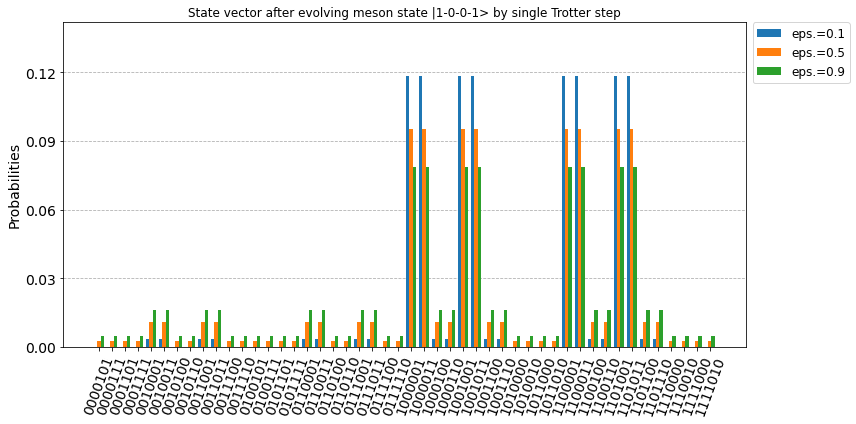

In [45]:
# study effect of Trotter step size epsilon
# run simulation for initial state |1-0-0-1>

statevectors_mes = []
legend_mes = []
probabilities_mes = []
print_state = True

print('initial\nstate    statevector\n--------------------------------------------')
for epsilon in np.arange(0.1,1.1,0.4):
    
    # reset initial state each time
    psi_1 = psi_mes_stretch.copy()
    if (print_state):
        psi1_dict = Statevector(psi_1).to_dict()
        print('meson   ', round_statevector(psi1_dict))
        initial_states = get_unique_states([psi1_dict])
        #print('\nstates present before time evolution '+str(initial_states))
        print_state = False  
    
    # time evolve state vector using Trotterized Hamiltonian
    statevector, probabilities, total_prob = trotter_evolve(psi_1, nsites, epsilon, mass, ntrotter,
                                                twirl=twirl, save_state_vector=save_state_vector)
    
    statevectors_mes.append(statevector)
    probabilities_mes.append(round_statevector(probabilities,2))  # useful for checking unitarity
       
    # label for plot legend
    legend_mes.append("eps.="+str(round(epsilon,2)))
    
# remove dictionary entries for basis state if coefficient is zero for all statevectors in list
# probabilities_mes += [abs_statevector(statevec_mes_start),abs_statevector(statevec_mes_end)]
clean_statevectors(probabilities_mes)   
final_states = get_unique_states(probabilities_mes)
#print('\nstates present after time evolution '+str(final_states))   

new_states = list(set(final_states)-set(initial_states))
print('\n*** '+str(len(new_states))+' new states introduced by time evolution ***\n'+str(new_states))

Qnet = list(set([net_charge(s) for s in final_states]))
if (len(Qnet) > 1):
    print(f'\n*** WARNING: final state does not have definite net charge ***\nQnet(final) = {Qnet}')
else:
    print(f'\nQnet(final) = {Qnet[0]}')
 
plot_histogram(probabilities_mes,title='State vector after evolving meson state |1-0-0-1> by single Trotter step',legend=legend_mes,bar_labels=False,color=colors[:len(statevectors_mes)+3],figsize=(12,6))